# Alucar - Analisando as vendas


## Análise básica dos dados

In [ ]:
import pandas as pd

In [ ]:
alucar = pd.read_csv('alucar.csv')

In [ ]:
alucar

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63
5,2017-06-30,81
6,2017-07-31,101
7,2017-08-31,124
8,2017-09-30,148
9,2017-10-31,174


In [ ]:
print('Quantidade de linhas e colunas', alucar.shape)


Quantidade de linhas e colunas (24, 2)


Podemos ver que os dados são mês a mês então, tems 24 dados, logo são dois anos de dados.


In [ ]:
print ('Quantidade de dados nulos', alucar.isna().sum())
#Mostrando quantos dados nulos tem em cada coluna


Quantidade de dados nulos mes       0
vendas    0
dtype: int64


In [ ]:
print ('Quantidade de dados nulos', alucar.isna().sum().sum())
#Quantidade de dados nulos todos

Quantidade de dados nulos 0


In [ ]:
alucar.isnull().sum()

mes       0
vendas    0
dtype: int64

In [ ]:
alucar.isna()
#Mostra dado a dado se é nulo ou não com uma booleana

,mes,vendas
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [ ]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [ ]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
#convertendo uma string pra o tipo datetime para configurar passagem do time

Para trabalharmos com séries temporais, precisamos de uma noção de tempo, o que o tipo de variável 'string' não tem, então precisaremos modificar o tipo da variável 'mes', porque com esse tipo de variavel não temos noção da mudança de tempo, uma variável que nós dá essa ideia de mudança de tempo, é o 'datetime' que irá transformar a 'string mes' em um 'datetime mes' que é basicamente uma data.


In [ ]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

Mes agora tem o tipo de variavel datetime

## Análise visual

In [ ]:
!pip install seaborn==0.9.0
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

     |████████████████████████████████| 215kB 7.6MB/s 
  Found existing installation: seaborn 0.11.1
    Uninstalling seaborn-0.11.1:
      Successfully uninstalled seaborn-0.11.1


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Verificando versão do seaborn
print(sns.__version__)

0.9.0


Verificando se as vendas da Alucar aumentam ou diminuem com o passar dos meses.

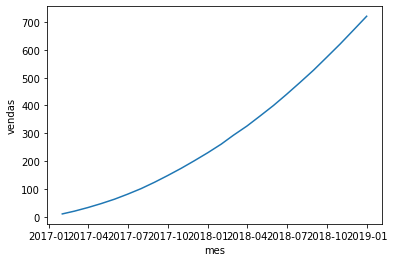

In [ ]:
sns.lineplot(x='mes', y='vendas', data=alucar)

Podemos ver que conforme passa o tempo, as vendas aumenta, no caso conforme passa os meses.

Conforme o tempo passa a alucar, está vendendo mais.

## Estilizando os gráficos

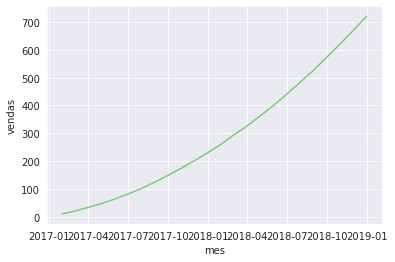

In [ ]:
sns.set_palette('Accent')
#Alterando a palheta de cores do gráfico
sns.set_style('darkgrid')
#Colocando grid no gráfico, que uma marcação de linha e colunas
ax = sns.lineplot(x='mes', y='vendas', data=alucar)

In [ ]:
ax.figure.set_size_inches(12,6)

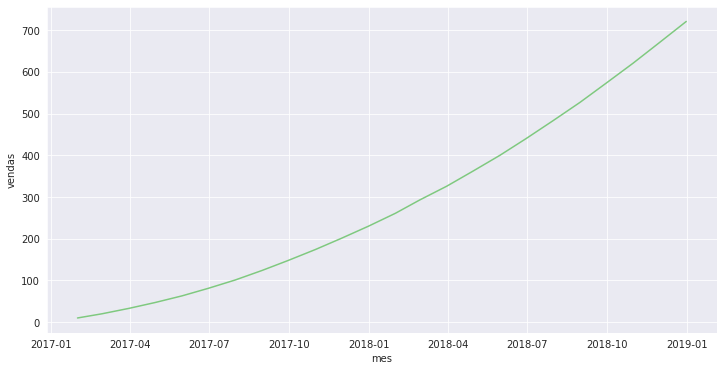

In [ ]:
ax.figure

In [ ]:
ax.set_title('Vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)

Text(17.200000000000003, 0.5, 'Vendas (R$)')

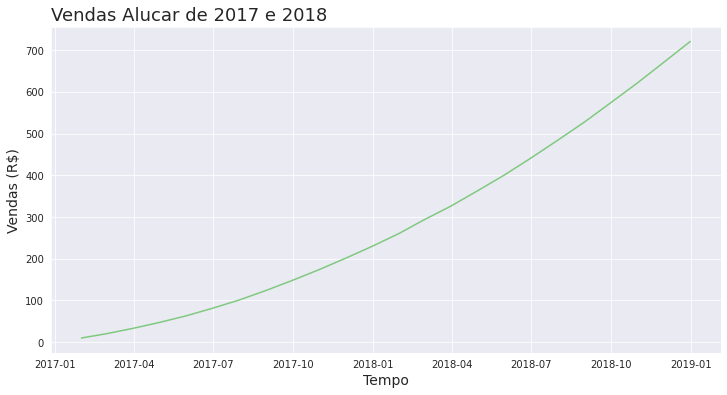

In [ ]:
ax.figure

## Decomposição do dados (time series)

Fazendo análises com o aumento e aceleração das vendas

In [ ]:
alucar['aumento'] = alucar['vendas'].diff()

Essa nova variável indicará o número do aumento de vendas por mês, quando de carros foram vendidos por mês

In [ ]:
alucar

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0
5,2017-06-30,81,18.0
6,2017-07-31,101,20.0
7,2017-08-31,124,23.0
8,2017-09-30,148,24.0
9,2017-10-31,174,26.0


Gráfico:

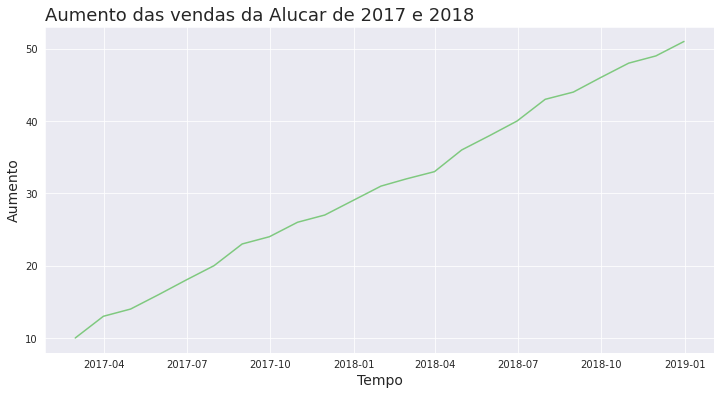

In [ ]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento das vendas da Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14)
ax=ax


Podemos verificar que o aumento é menos retilínio que o gráfico de vendas por tempo, mas sempre está vendendo mais que o mês anterior.

Definindo uma função chamada plotar


In [ ]:
def plotar(titulo, labelx, labely, x,y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=x, y=y, data=dataset)
  ax.figure.set_size_inches(12,6)
  ax.set_title(titulo, loc='left', fontsize=18)
  ax.set_xlabel(labelx, fontsize=14)
  ax.set_ylabel(labely, fontsize=14)


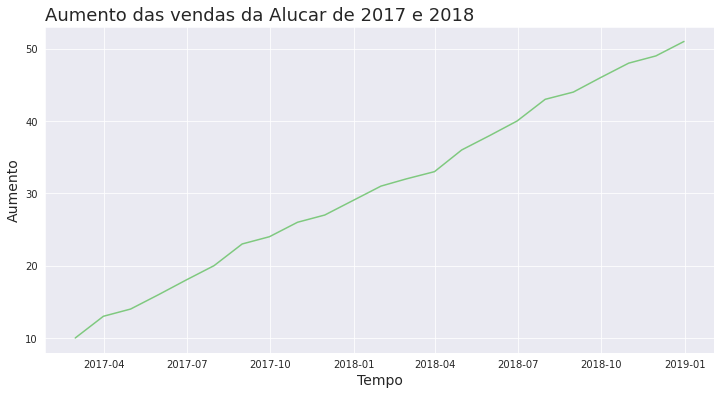

In [ ]:
plotar ('Aumento das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aumento', 'mes','aumento', alucar)

Sempre teve um acréscimo ao aumento de vendas, ou seja, no mês seguinte o aumento de vendas é sempre maior que no mês anterior, as vendas poderiam estar crescendo porém em desaceleraçã. 
Sendo em um mês temos um aumento de vendas em 50 e no outro em 48, assim tendo uma desaceleração em relação ao número de vendas, não uma diminuição no número de vendas, mas não foi isso que aconteceu.

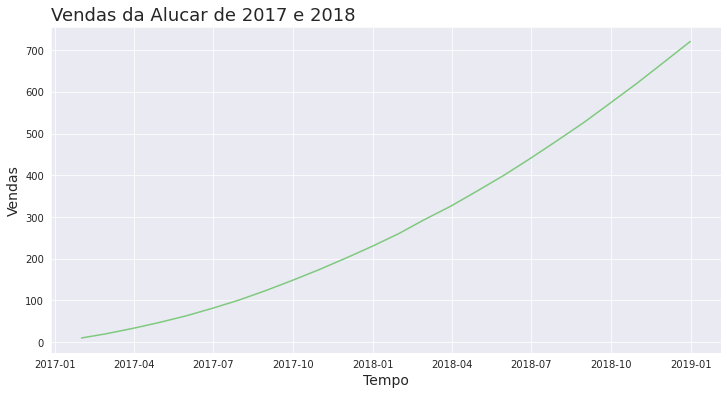

In [ ]:
plotar ('Vendas da Alucar de 2017 e 2018', 'Tempo', 'Vendas', 'mes','vendas', alucar)

In [ ]:
alucar['aceleracao'] = alucar['aumento'].diff()

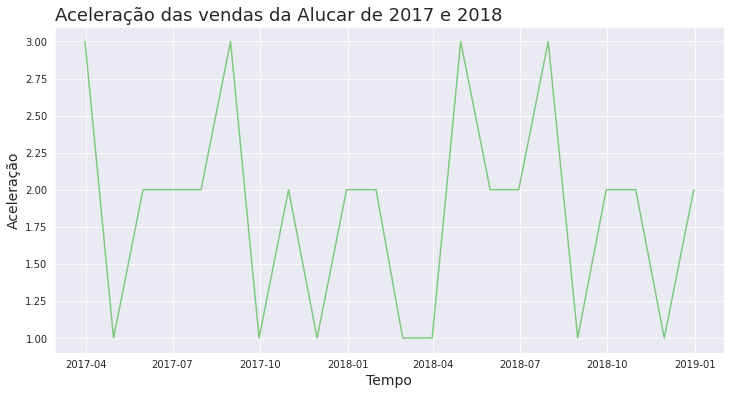

In [ ]:
plotar ('Aceleração das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aceleração', 'mes','aceleracao', alucar)

Percebemos que está sempre com uma aceleração positiva, apesar de em alguns meses ter uma aceleração menor do que em outros, está sempre acelerando, está sempre com um aumento de vendas maior do que o do mês anterior, nunca menor.

In [ ]:
alucar

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0
5,2017-06-30,81,18.0,2.0
6,2017-07-31,101,20.0,2.0
7,2017-08-31,124,23.0,3.0
8,2017-09-30,148,24.0,1.0
9,2017-10-31,174,26.0,2.0


## Juntando os gráficos

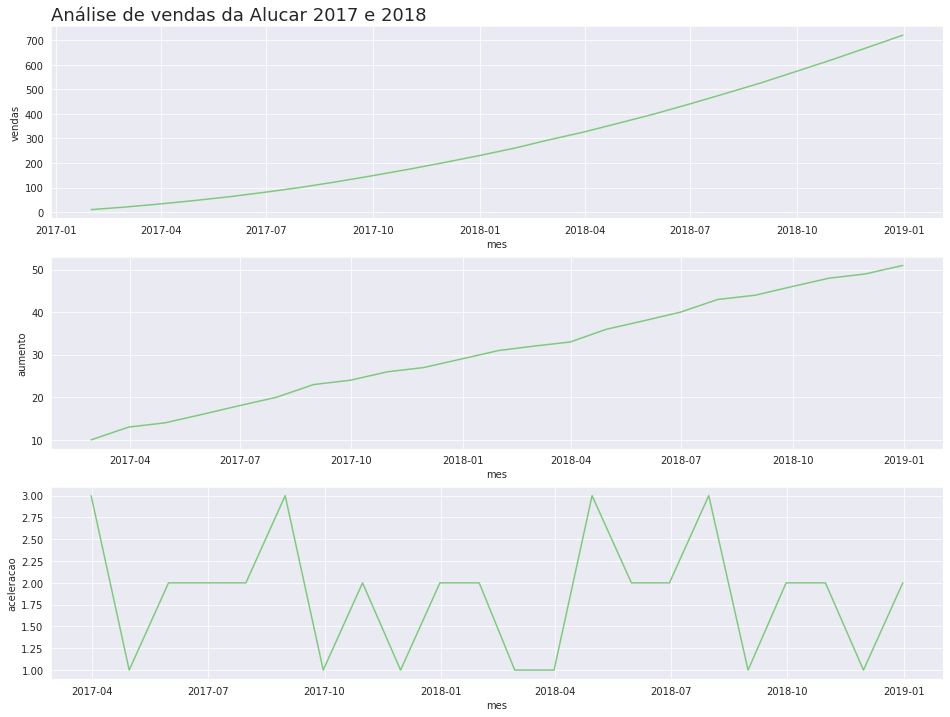

In [ ]:

plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
#plt.subplot nesse caso está dividindo em três partes, o gráfico 1 está ocupando toda uma parte, que no caso é a primeira.
ax.set_title('Análise de vendas da Alucar 2017 e 2018',fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax=ax

In [ ]:
def tresgraficos(x1, y1, x2, y2, x3, y3, dataset, titulo):
  plt.figure(figsize=(16,12))
  ax = plt.subplot(3,1,1)
  ax.set_title(titulo,fontsize=18, loc='left')
  sns.lineplot(x=x1, y=y1 , data=dataset)
  plt.subplot(3,1,2)
  sns.lineplot(x=x2, y=y2, data=dataset)
  plt.subplot(3,1,3)
  sns.lineplot(x=x3, y=y3, data=dataset)
  ax=ax

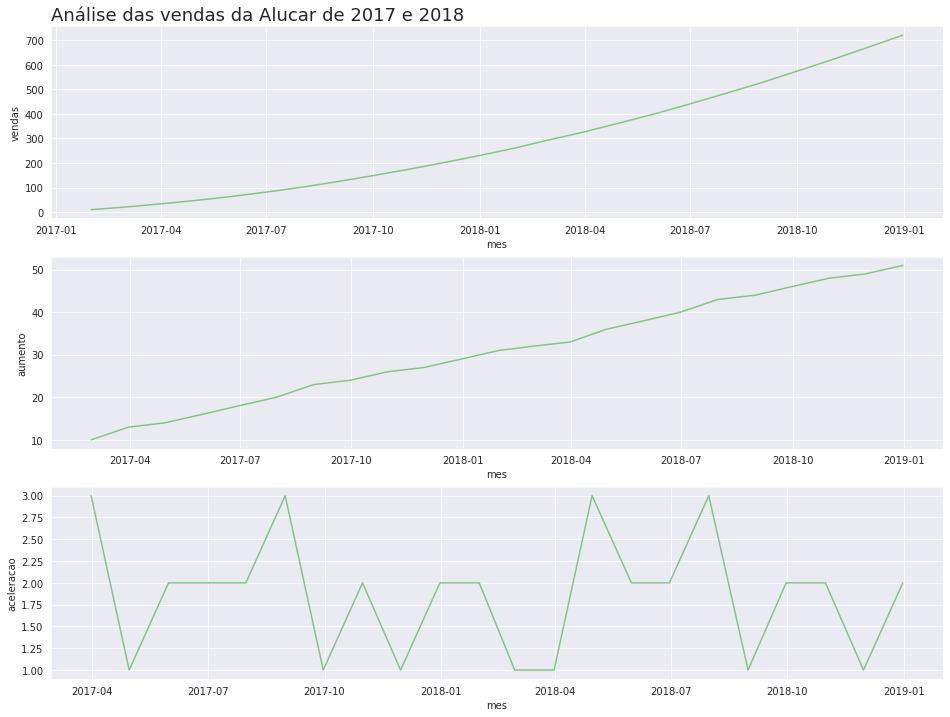

In [ ]:
tresgraficos('mes', 'vendas','mes', 'aumento','mes', 'aceleracao', alucar, 'Análise das vendas da Alucar de 2017 e 2018') 

Em quase todas time series há uma tendencia. 

Nessa a tendência, o que estará acontecendo com o valor, será um aumento. Fica claro entender isso com os gráficos juntos mostrando que há aumento das vendas conforme o passar dos meses, o crescimento mês a mês e a aceleração desse crescimento. Esses valores serão sempre positivos, em nenhum momento o aumento das vendas cairá.

## Autocorrelação

In [ ]:
from pandas.plotting import autocorrelation_plot

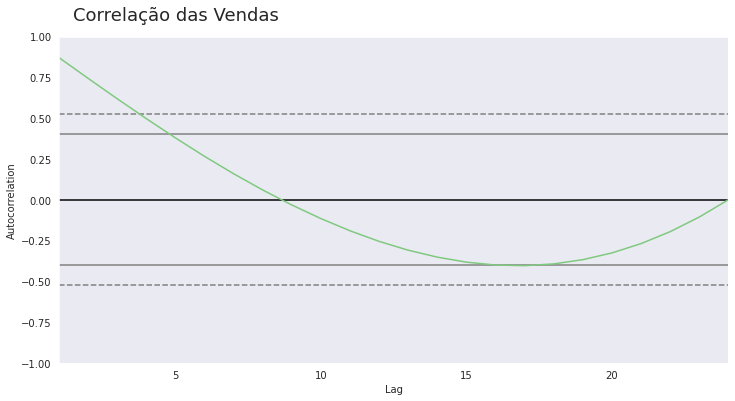

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das Vendas', fontsize=18, x=0.26, y=0.95)
#Colocando o  título do gráfico bem a esquerda
autocorrelation_plot(alucar['vendas'])
ax = ax

Nesse gráfico, haverá uma correlação significativa no Lag 1 que descrescerá com o passar do tempo, até se tornar nula. Poderemos reparar nesse gráfico, então, que os 7 primeiros dias parecerão ter uma forte ligação com a semana passada, porque a correlação estará alta nesse período. Com o passar do tempo ela será menor até a nulidade.

Então podemos dizer que as vendas daqui a muitos dias não tem correlação com a de hoje, mas as vendas daqui a 7 dias tem correlação com a de hoje.

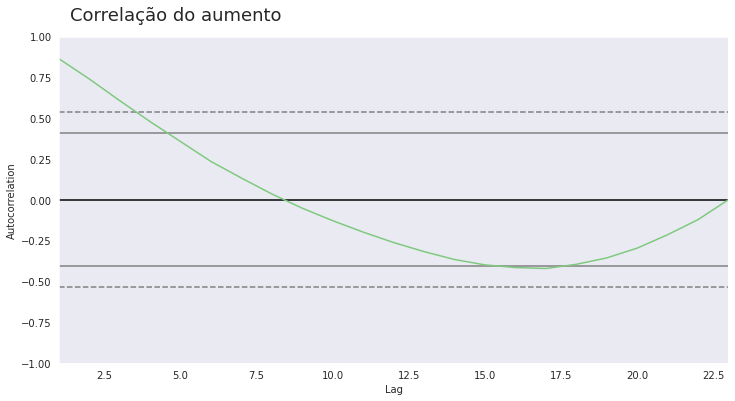

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento', fontsize=18, x=0.26, y=0.95)
#Colocando o  título do gráfico bem a esquerda
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

Semelhante a correlação de vendas


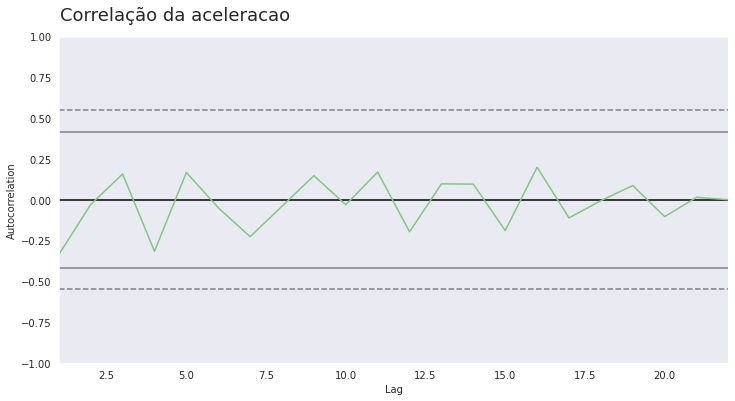

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleracao', fontsize=18, x=0.26, y=0.95)
#Colocando o  título do gráfico bem a esquerda
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax

O que podemos concluir?

Podemos concluir que os 7 primeiros dias parecem ter uma ligação muito forte com o da semana passada. Com o passar dos Lags essa correlação decrescerá.

# Alucar - Analisando assinantes da newsletter

Verificar o comportamento do número de assinantes da newsletter, se tem aumentado ou diminuído.

In [ ]:
import pandas as pd
assinantes = pd.read_csv('newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [ ]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

É importante que mês seja do tipo datetipe, então temos que fazer uma transformação no tipo dos dados.

In [ ]:
print('Quantidade de linhas e colunas', assinantes.shape)
print('Quantidade de dados nulos', assinantes.isna().sum().sum())

Quantidade de linhas e colunas (24, 2)
Quantidade de dados nulos 0


In [ ]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

## Aumento e aceleração do número de assinantes da newsletter

In [ ]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()

In [ ]:
assinantes

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0
5,2017-06-30,66,17.0,2.0
6,2017-07-31,85,19.0,2.0
7,2017-08-31,107,22.0,3.0
8,2017-09-30,132,25.0,3.0
9,2017-10-31,160,28.0,3.0


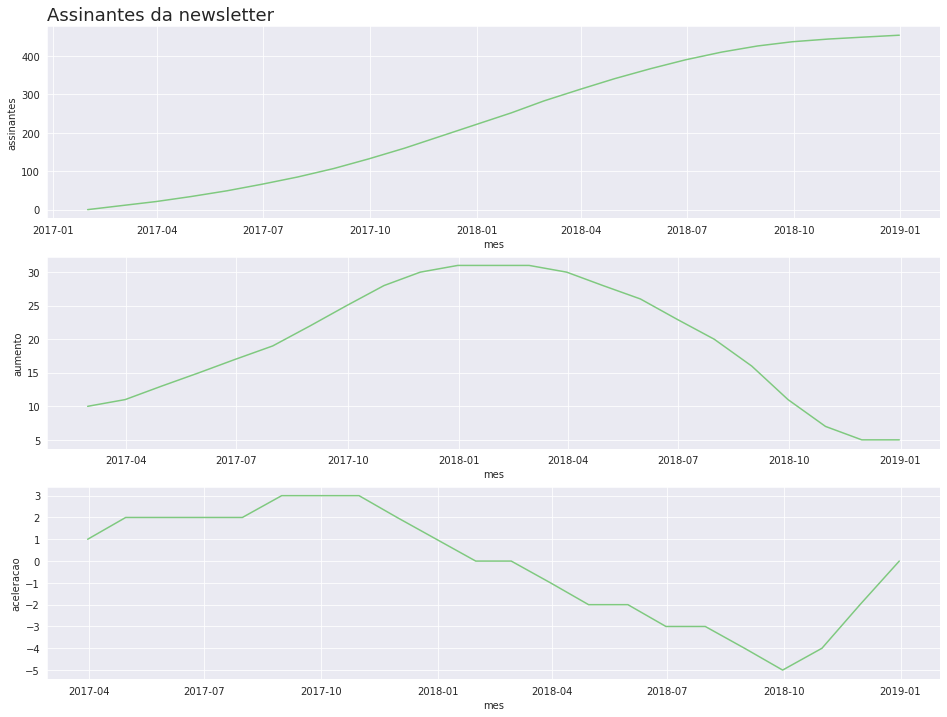

In [ ]:
tresgraficos('mes', 'assinantes', 'mes', 'aumento', 'mes', 'aceleracao', assinantes, 'Assinantes da newsletter' )

O primeiro, de assinantes, crescerá inicialmente, depois esse aumento reduzirá, mas a tendência será de crescimento de qualquer forma, ou seja, tendo sempre um crescimento dos assinantes da newsletter.


O gráfico de aumento dos assinantes teve um boom no inicio de 2018, mas chegando num determinado período de tempo, um pouco antes do mês 4 de 2018, o aumento começa a caia, ou seja, continua a ter um aumento no número de assinantes, porém ele é menor que o do mês anterior, até ficar quase com um aumento de assinantes nulos.


Então está sendo mantido o número de assinantes, fidelidade, porém sem conseguir novos assinantes.


A aceleração começa positiva, entretanto, se torna negativa muito significantemente. No mês 10 de 2018, chega quase a -5 antes de se recuperar um pouco, ou seja, está indicando que cada vez a menos novos assinantes, há uma desaceleração no número de assinantes.



#Analisando as vendas da  Chocolura

O problema é que em determinado período do ano, a empresa não dá conta da demanda. Por mais que produza, não tem sido o suficiente. Tentaremos descobrir o que está acontecendo com as vendas da Chocolura.

In [ ]:
chocolura = pd.read_csv('chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [ ]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [ ]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])

In [ ]:
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [ ]:
print ('Quantidade de linhas:', chocolura.shape)

Quantidade de linhas: (24, 2)


In [ ]:
print ('Quantidade de dados nulos:', chocolura.isna().sum().sum())

Quantidade de dados nulos: 0


In [ ]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleração'] = chocolura['aumento'].diff()

In [ ]:
chocolura.head()

,mes,vendas,aumento,aceleração
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


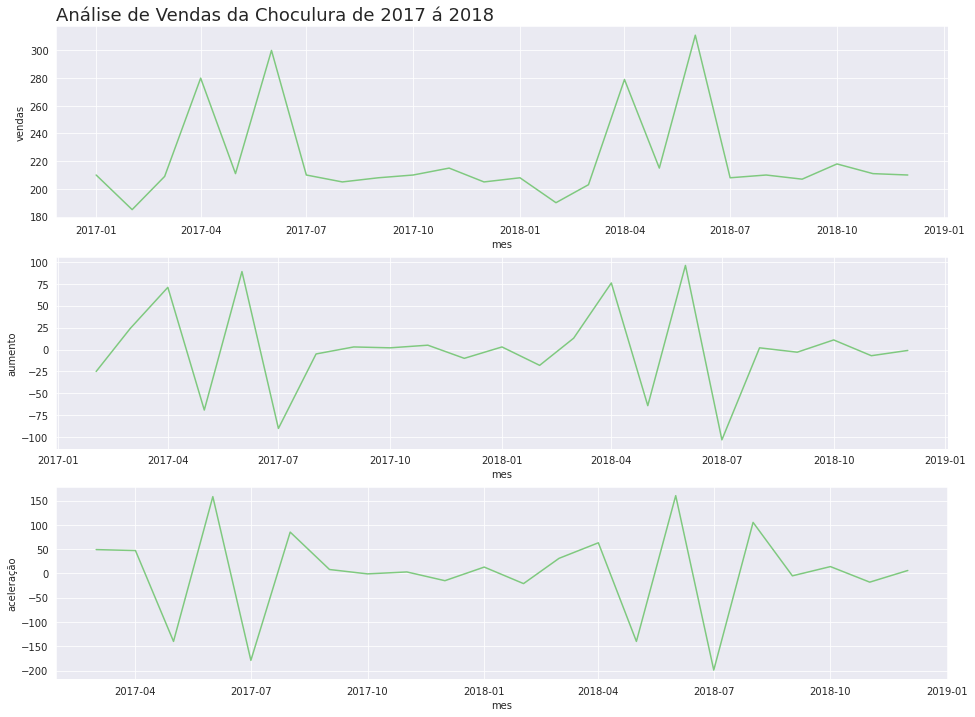

In [ ]:
tresgraficos('mes', 'vendas', 'mes', 'aumento', 'mes', 'aceleração', chocolura, "Análise de Vendas da Choculura de 2017 á 2018")

Começando com o gráfico de vendas, o gráfico começa com uma queda das vendas no mês de Janeiro de 2017. Há um crescimento grande especificamente no mês 4 e uma queda posterior. Depois, há também um crescimento aproximadamente no mês 6, Junho.

De Julho de 2017 ao mês de Janeiro de 2018 ocorre novamente uma queda, e se repete o crescimento no mês 4 de 2018 e o próximo ao mês 6. Ou seja, o que acontece é que podemos encontrar algo interessante com relação a Time Series: a sazonalidade.

A sazonalidade é um padrão repetitivo dentro de um determinado período fixo de tempo. Ou seja, sempre no mês 4 e no 6 a empresa venderá mais chocolate. Durante os demais meses, vende menos.

Também notamos um aumento e uma acelração nos meses 4 e 6 de 2017 e 2018, mostrando que há uma sazonalidade nesses meses.

## Chocolura - Vendas diárias (Outubro e Novembro de 2018)

Uma loja em especial chamou muito a atenção dos diretores da empresa pelas vendas diárias nos meses de Outubro e Novembro de 2018.

In [ ]:
vendas_por_dia = pd.read_csv('vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [ ]:
print ('Quantidade de linhas:',vendas_por_dia.shape)
print ('Quantidade de dados nulos:', vendas_por_dia.isna().sum().sum())

Quantidade de linhas: (61, 2)
Quantidade de dados nulos: 0


In [ ]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [ ]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [ ]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleração'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleração
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


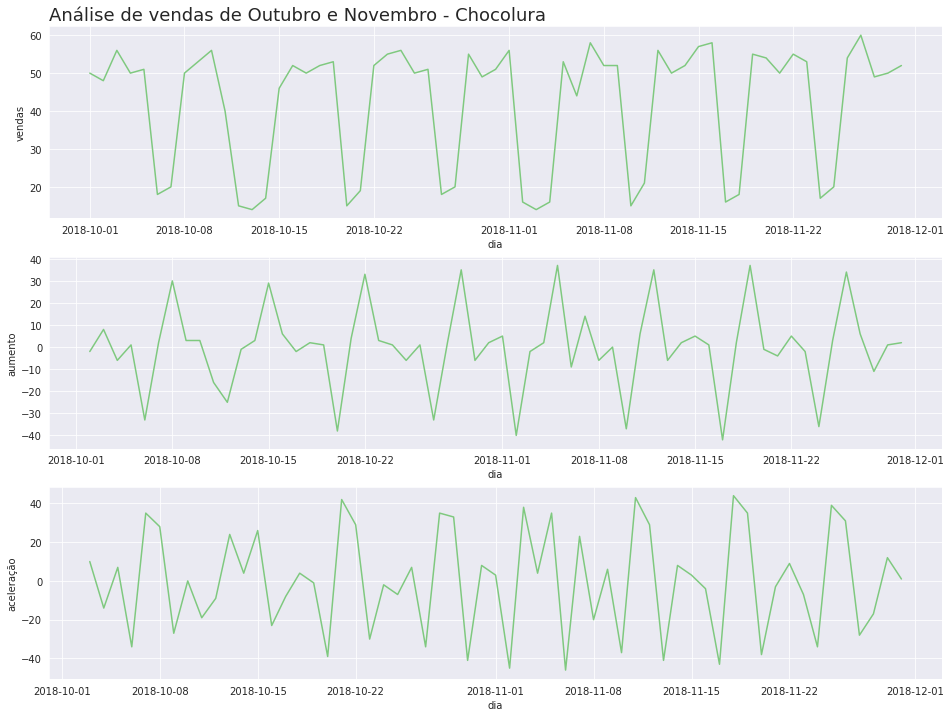

In [ ]:
tresgraficos('dia', 'vendas', 'dia', 'aumento', 'dia', 'aceleração', vendas_por_dia, 'Análise de vendas de Outubro e Novembro - Chocolura')

Temos um padrão sazonal mais uma vez, por que as vendas crescem e ficam constante e depois caem abruptamente.

Temos um reflexo do padrão sazonal tanto no aumento como na aceleração das vendas.

**Analisando a sazonalidade**

In [ ]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()
vendas_por_dia.head()

,dia,vendas,aumento,aceleração,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [ ]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [ ]:
dias_traduzidos = {'Monday': 'Segunda', 'Tuesday' : 'Terca', 'Wednesday':'Quarta', 'Thursday':'Quinta', 'Friday':'Sexta', 'Saturday':'Sábado', 'Sunday':'Domingo'}

In [ ]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)
vendas_por_dia

,dia,vendas,aumento,aceleração,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terca
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
...,...,...,...,...,...
56,2018-11-26,54,34.0,31.0,Segunda
57,2018-11-27,60,6.0,-28.0,Terca
58,2018-11-28,49,-11.0,-17.0,Quarta
59,2018-11-29,50,1.0,12.0,Quinta


Podemos que tem quedas muito acentuadas em sábados, domingos e feriados. Isso pode significar que a empresa durante esses dias não abra durante todo o horário comercial, ou não disponibilize todos os seus vendedores, porque há vendas, mas elas são diminutas.

##Agrupando os dias

In [ ]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleração'].mean().round()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
vendas_agrupadas

,vendas,aumento,aceleração
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Sábado,16.0,-28.0,-20.0
Terca,52.0,-1.0,-34.0


Então,podemos concluir analisando a sazonalidade que as quedas representadas no gráfico serão referentes aos finais-de-semana. Por alguma regra dos negócios da empresa, esses dias, contando com feriados, contaram bastante para a tendência que nosso gráfico apresentará.

Os dias da semana contaram para termos uma sazonalidade bem forte.

**Verificar se os valores de vendas, aumento e aceleração estarão correlacionados.**

##Correlação das vendas diárias

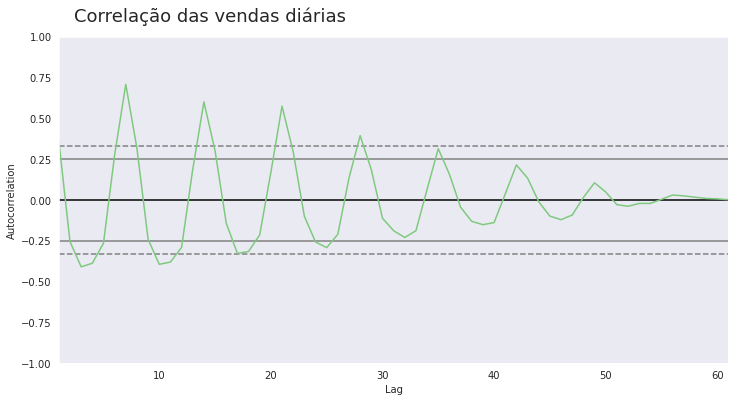

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

Temos uma correlação muito forte, que chega a sair da margem de significância atingindo 0.75, e diminui conforme os Lags, a correlação significativa cresce e decresce.

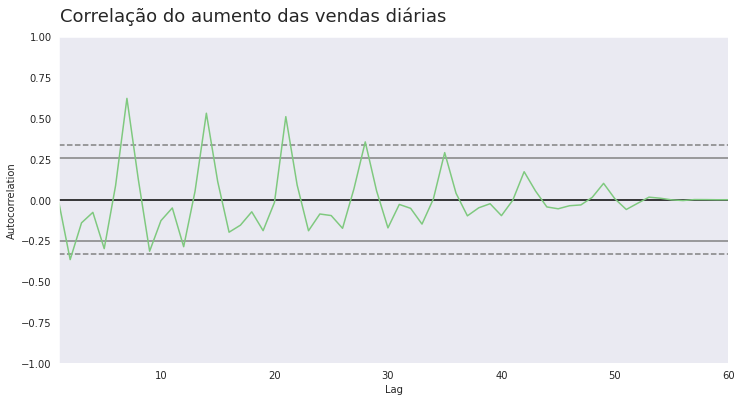

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento das vendas diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax

No aumento também uma haverá uma correlação grande e que diminuirá com o passar do tempo.

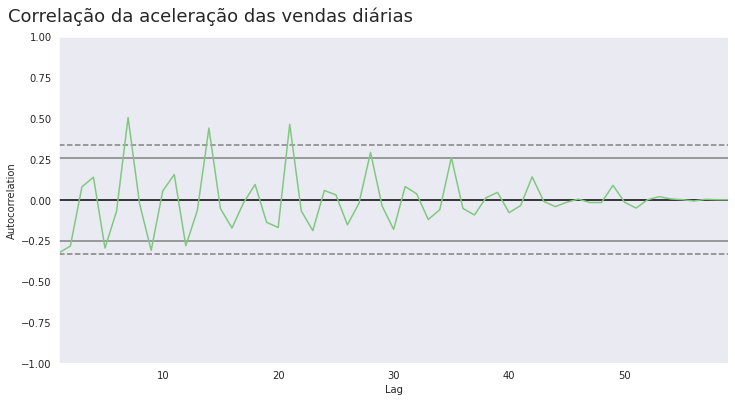

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleração'][2:])
ax = ax

Nesse gráficos veremos que também existirá correlação, mas ela será um pouco menor, ainda que influencie. O gráfico ultrapassará positivamente a faixa de significância algumas vezes antes de cair e ficar nulo.

#Cafelura - Análise de vendas

In [ ]:
cafelura = pd.read_csv('cafelura.csv')

In [ ]:
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [ ]:
 cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [ ]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])

In [ ]:
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [ ]:
print('Quantidade de linhas e colunas:', cafelura.shape)
print('Quantidade de dados nulos:', cafelura.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


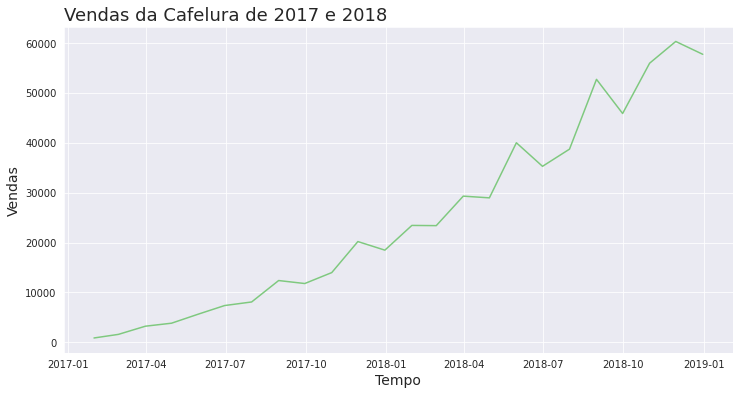

In [ ]:
plotar('Vendas da Cafelura de 2017 e 2018', 'Tempo', 'Vendas', 'mes', 'vendas', cafelura)

Gráfico mostra que a empresa realmente está crescendo, porém o gráfico é de confiança?

##Iremos normalizar essa timeseries

A normalização é uma prática comum do trabalho com Time Series. Geralmente, a quantidade de dias úteis do mês, de dias da semana ou até dias úteis são técnicas utilizadas para normalizar séries temporais.

Então iremos normalizar essa time series baseado nos dias de finais de semanas que temos em cada mês.

In [ ]:
quantidade_de_dias_de_fds = pd.read_csv('dias_final_de_semana.csv')

In [ ]:
quantidade_de_dias_de_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [ ]:
quantidade_de_dias_de_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [ ]:
cafelura['vendas_normalizadas'] = cafelura['vendas']/quantidade_de_dias_de_fds['quantidade_de_dias'].values

In [ ]:
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


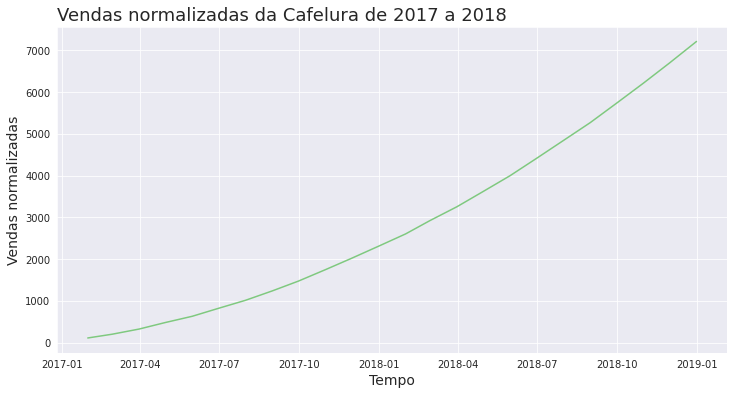

In [ ]:
plotar('Vendas normalizadas da Cafelura de 2017 a 2018', 'Tempo', 'Vendas normalizadas', 'mes', 'vendas_normalizadas', cafelura)

Considerando que a Cafelura abre apenas aos finais de semanas com essa normalização conseguimos verificar que agora ele está mais coerente apenas com uma curva de crescimento.

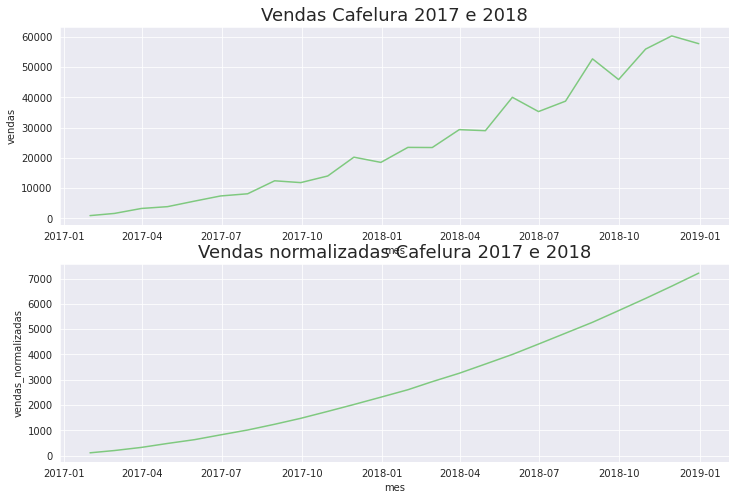

In [ ]:
plt.figure(figsize=(12,8))
ax=plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=cafelura)
ax=plt.subplot(2,1,2)
ax.set_title('Vendas normalizadas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)
ax=ax 

**Sempre que analisarmos Time Series será necessário identificar componentes como a tendência, a sazonalidade e essas variações aleatórias, os ruídos. Esses elementos sempre serão presentes nas séries temporais.**

# Statsmodel

 Será que existe alguma forma de passar os dados e eles nos mostrarem o que será a tendência, a sazonalidade e o ruído de uma só vez?

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

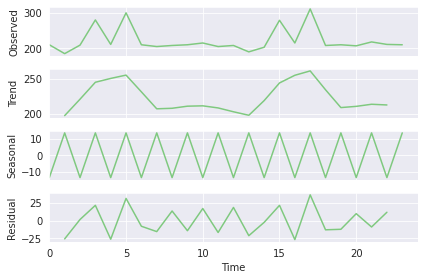

In [ ]:
resultado = seasonal_decompose([chocolura['vendas']], freq = 2)
ax = resultado.plot()

In [ ]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [ ]:
data = ({
    'observacao' : observacao,
    'tendencia' : tendencia,
    'sazonalidade' : sazonalidade,
    'ruido': ruido

})

In [ ]:
resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210,NaN,-13.386364,NaN
1,185,197.25,13.386364,-25.636364
2,209,220.75,-13.386364,1.636364
3,280,245.00,13.386364,21.613636
4,211,250.50,-13.386364,-26.113636


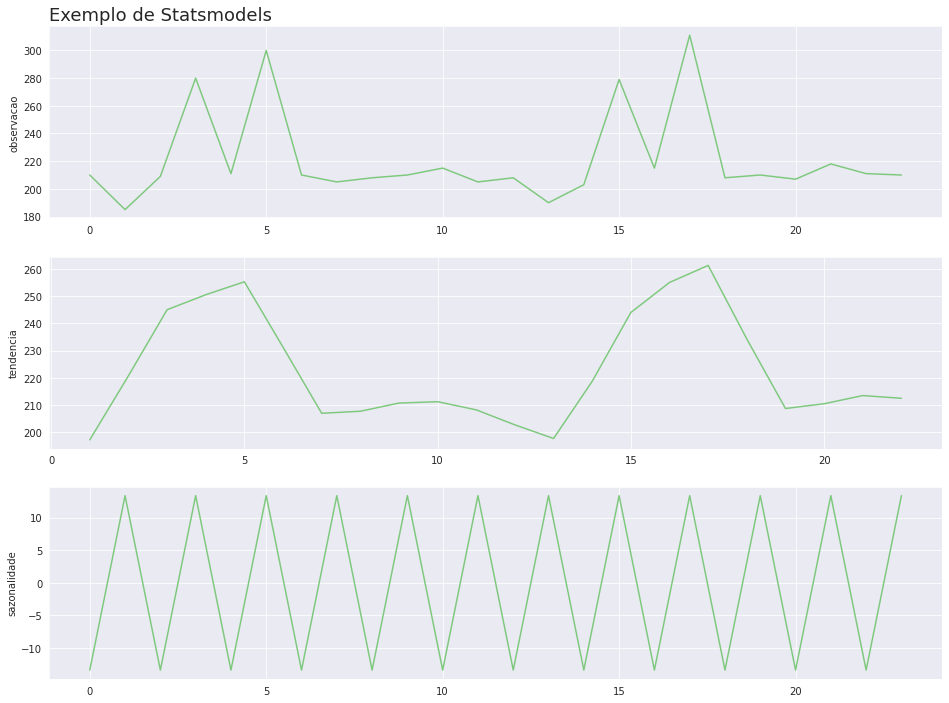

In [ ]:
tresgraficos(resultado.index,'observacao', resultado.index, 'tendencia', resultado.index, 'sazonalidade', resultado, 'Exemplo de Statsmodels')

# Alucel - análise de vendas

Queremos saber a empresa continuará tendo boas vendas ou não.

In [ ]:
alucel = pd.read_csv('alucel.csv')

In [ ]:
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [ ]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [ ]:
alucel['dia'] = pd.to_datetime(alucel['dia'])

In [ ]:
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [ ]:
print('Quantidade de linhas e colunas:', alucel.shape)
print('Quantidade de dados nulos:', alucel.isna().sum().sum())

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


In [ ]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()

In [ ]:
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


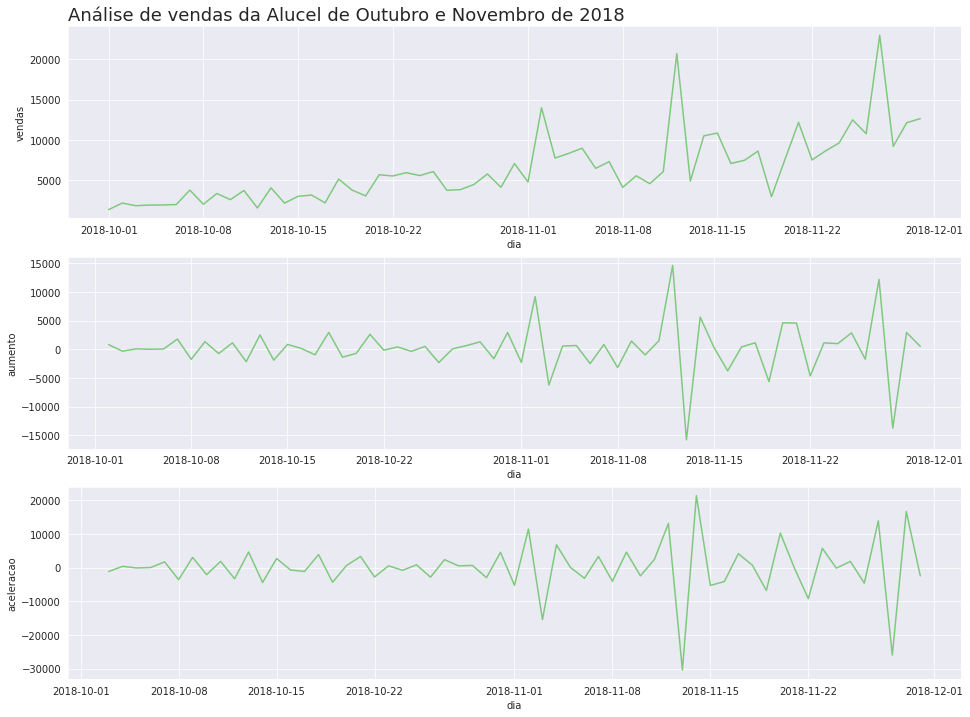

In [ ]:
tresgraficos('dia','vendas','dia','aumento','dia','aceleracao',alucel, 'Análise de vendas da Alucel de Outubro e Novembro de 2018')

Nosso gráfico de vendas, como vimos, tem bastante ruído com crescimento. O de aumento se manteve linear no início, mas teve uma queda importante um pouco antes do dia 15. Analisando a aceleração, também tivemos valores positivos a princípio, e depois uma queda bastante drástica. Mas no geral, há ruído em muitos pontos.

Temos como normalizar esses gráficos? Temos muitos pontos, muitos picos, a variação entre o número de vendas tá muito grande.

Então tentaremos normalizar essas linhas, sabendo os benefícios e cuidados que precisaremos tomar ao aplicar a normalização.

Há dias em que os valores das vendas foram muito altos, e em outros, muito baixos. Então, temos bastante frequência em diferentes pontos.

Existe uma técnica muito conhecida e utilizada para a redução desses ruídos, a **Média Móvel.**

A ideia é tentar minimizar os ruídos de uma série temporal através de médias móveis, pegando dois ou mais pontos e calculando uma média de 7 dias entre eles.

## Média Móvel

In [ ]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()

In [ ]:
alucel.head()

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN


In [ ]:
alucel.head(14)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429
7,2018-10-08,2039.59,-1753.48,-3540.66,2252.827143
8,2018-10-09,3365.58,1325.99,3079.47,2421.382857
9,2018-10-10,2616.12,-749.46,-2075.45,2529.348571


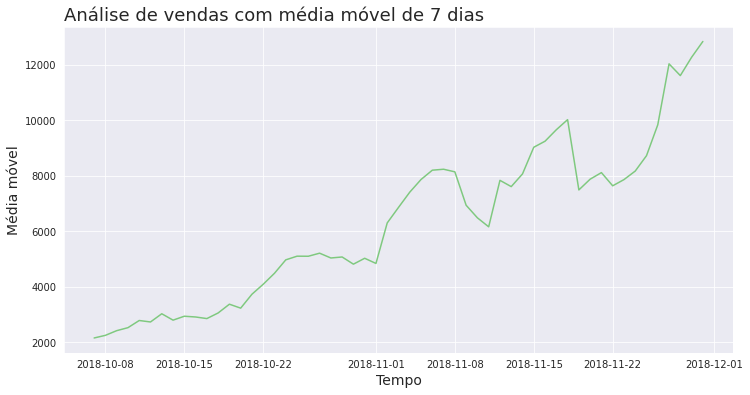

In [ ]:
plotar("Análise de vendas com média móvel de 7 dias", 'Tempo', 'Média móvel', 'dia', 'media_movel',alucel )

Não teremos tantos ruídos quanto antes, podemos notar a tendencia de crescimento.

In [ ]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()

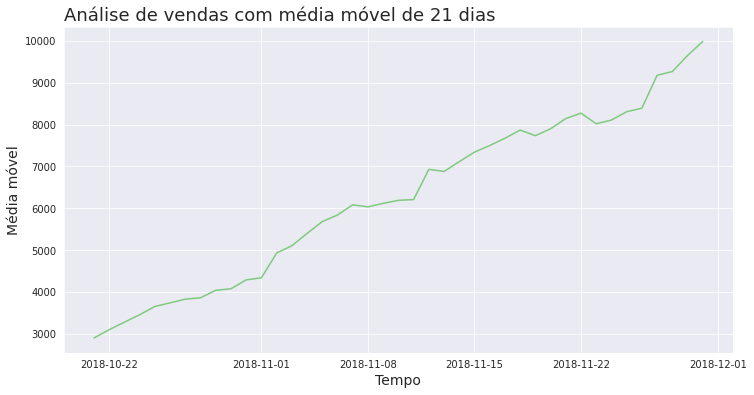

In [ ]:
plotar("Análise de vendas com média móvel de 21 dias", 'Tempo', 'Média móvel', 'dia', 'media_movel_21',alucel )

Fica com menos ruídos ainda, gráfico ficou normalizado.
Porém com um rolling muito grande perdemos informações, então tentando fazer um rolling menor pra não perder tantos dados e a essência dos gráficos.
Com um rolling menor podemos notar dados interessantes que aconteceram ao longo do tempo.

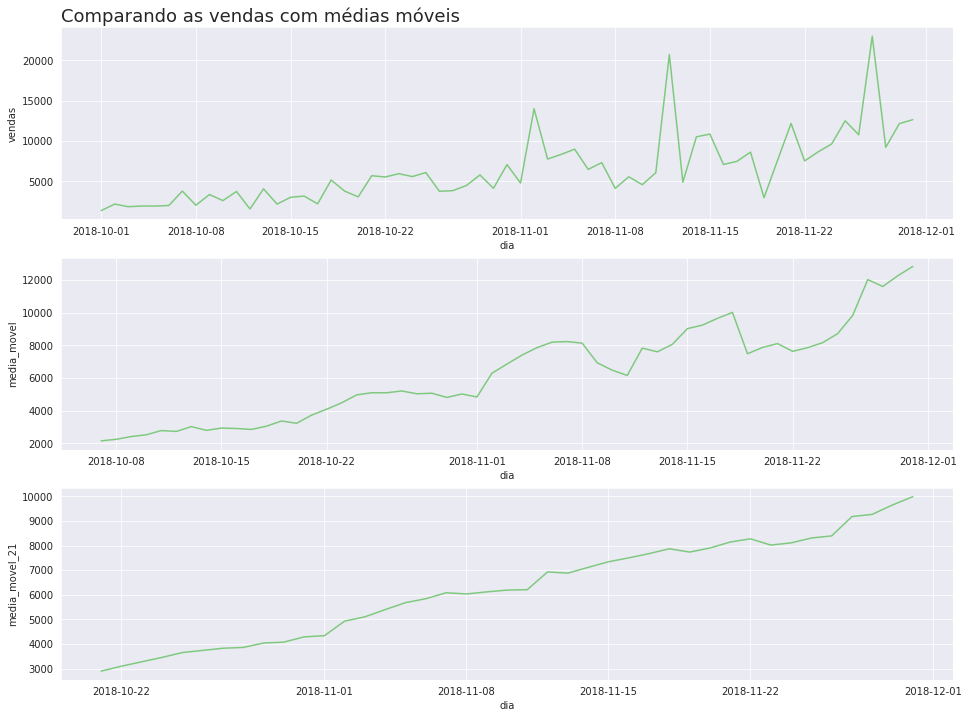

In [ ]:
tresgraficos('dia','vendas','dia','media_movel','dia','media_movel_21',alucel, 'Comparando as vendas com médias móveis')

Com a diferença da normalização que ocorre de forma mais suave na Média Móvel de 7 dias e mais intensificada na de 21 dias. Mesmo na média de 21 dias vemos que houve uma queda marcada.